In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pymc3 as pm
import arviz as az

sns.set()


In [61]:
meta_df = pd.read_excel('mortality_org.xlsx',sheet_name='Description',skiprows=21,usecols=[1,8])
meta_df.dropna(inplace=True)
meta_df

,Country code,Available years (week.year)
0,AUT,01.2000 - 41.2020
1,BEL,01.2000 - 40.2020
2,BGR,01.2010 - 41.2020
3,CHE,01.2000 - 39.2020
4,CHL,01.2016 - 41.2020
5,CZE,01.2005 - 35.2020
6,DEUTNP,01.2016 - 38.2020
7,DNK,01.2007 - 41.2020
8,ESP,01.2000 - 41.2020
9,EST,01.2000 - 41.2020


In [62]:
nordic_abbs = ['SWE','FIN','NOR','DNK','ISL']

#must fix explicit ref's to countries below, e.g. swe,fin,nor etc before using other countries
#high_hit_abbs = ['SWE','BEL','ESP','ITA','GBRTENW','USA']

abbs = nordic_abbs

In [63]:
df = pd.DataFrame()

for a in abbs:
    temp = pd.read_excel('mortality_org.xlsx',sheet_name=a,skiprows=2)
    
    df = pd.concat([df,temp],axis=0)

In [64]:
df

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,0-14.1,15-64.1,65-74.1,75-84.1,85+.1,Total.1,Split,SplitSex,Forecast
0,SWE,2000,1,m,7,146,216,412,371,1152,0.000434,0.002619,0.032464,0.088995,0.308641,0.013655,0,0,0
1,SWE,2000,1,f,5,91,141,380,595,1212,0.000327,0.001685,0.018434,0.057515,0.219750,0.014051,0,0,0
2,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070485,0.247080,0.013855,0,0,0
3,SWE,2000,2,m,6,142,192,403,325,1068,0.000372,0.002547,0.028857,0.087051,0.270373,0.012660,0,0,0
4,SWE,2000,2,f,3,80,116,380,585,1164,0.000196,0.001482,0.015165,0.057515,0.216057,0.013494,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,ISL,2020,40,f,0,0,1,5,11,17,0.000000,0.000000,0.003348,0.031503,0.143953,0.005039,0,0,1
3239,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1
3240,ISL,2020,41,m,0,2,4,7,4,17,0.000000,0.000838,0.013322,0.048597,0.082215,0.004798,0,0,1
3241,ISL,2020,41,f,0,1,1,6,11,19,0.000000,0.000452,0.003348,0.037803,0.143953,0.005632,0,0,1


In [65]:
df_2020 = (df[(df.loc[:,'Sex'] == 'b') & (df['Year'] == 2020)]).copy()

df_2020.rename(columns={'0-14.1': 'age_grp_0-14','15-64.1' : 'age_grp_15-64',
                      '65-74.1' : 'age_grp_65-74', '75-84.1' : 'age_grp_75-84',
                      '85+.1' : 'age_grp_85+','Total.1' : 'all_age_grp'},inplace=True)
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000200,0.001469,0.012978,0.039584,0.161078,0.009220,0,0,1
3125,SWE,2020,2,b,7,194,287,513,890,1891,0.000200,0.001584,0.013644,0.037056,0.176334,0.009575,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000200,0.001371,0.013882,0.036912,0.168409,0.009256,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000314,0.001380,0.013121,0.038645,0.146417,0.008759,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000257,0.001388,0.013644,0.039801,0.164446,0.009352,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
3233,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
3236,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
3239,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


In [66]:
df_timeline = (df[(df.loc[:,'Sex'] == 'b')]).copy()
df_timeline.rename(columns={'0-14.1': 'age_grp_0-14','15-64.1' : 'age_grp_15-64',
                      '65-74.1' : 'age_grp_65-74', '75-84.1' : 'age_grp_75-84',
                      '85+.1' : 'age_grp_85+','Total.1' : 'all_age_grp'},inplace=True)
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070485,0.247080,0.013855,0,0,0
5,SWE,2000,2,b,9,222,308,783,910,2232,0.000286,0.002023,0.021535,0.069684,0.232757,0.013082,0,0,0
8,SWE,2000,3,b,11,232,289,724,837,2093,0.000350,0.002114,0.020206,0.064433,0.214085,0.012267,0,0,0
11,SWE,2000,4,b,7,230,295,724,831,2087,0.000223,0.002096,0.020626,0.064433,0.212550,0.012232,0,0,0
14,SWE,2000,5,b,6,248,316,703,743,2016,0.000191,0.002260,0.022094,0.062565,0.190042,0.011816,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
3233,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
3236,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
3239,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


In [67]:
def year_week_2_date(y,w):
    return pd.to_datetime(str(y) + ' ' + str(w) + ' 0',format='%Y %W %w')


df_timeline.index = df_timeline.apply(lambda row : year_week_2_date(row.Year,row.Week),axis=1)
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2000-01-09,SWE,2000,1,b,12,237,357,792,966,2364,0.000382,0.002160,0.024961,0.070485,0.247080,0.013855,0,0,0
2000-01-16,SWE,2000,2,b,9,222,308,783,910,2232,0.000286,0.002023,0.021535,0.069684,0.232757,0.013082,0,0,0
2000-01-23,SWE,2000,3,b,11,232,289,724,837,2093,0.000350,0.002114,0.020206,0.064433,0.214085,0.012267,0,0,0
2000-01-30,SWE,2000,4,b,7,230,295,724,831,2087,0.000223,0.002096,0.020626,0.064433,0.212550,0.012232,0,0,0
2000-02-06,SWE,2000,5,b,6,248,316,703,743,2016,0.000191,0.002260,0.022094,0.062565,0.190042,0.011816,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
2020-09-27,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
2020-10-04,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
2020-10-11,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


In [68]:
country_grp = df_timeline.groupby('Country')
swe = country_grp.get_group('SWE').resample('Y').mean().loc['2000-01-01' :]
fin = country_grp.get_group('FIN').resample('Y').mean().loc['2000-01-01' :]
den = country_grp.get_group('DNK').resample('Y').mean().loc['2000-01-01' :]
nor = country_grp.get_group('NOR').resample('Y').mean().loc['2000-01-01' :]
isl = country_grp.get_group('ISL').resample('Y').mean().loc['2000-01-01' :]

swe

,Year,Week,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2000-12-31,2000.000000,26.500000,9.384615,230.057692,263.730769,605.076923,647.942308,1756.192308,0.000299,0.002096,0.018440,0.053850,0.165728,0.010293,0.0,0.0,0.0
2001-12-31,2001.000000,26.500000,10.000000,229.884615,259.365385,601.000000,667.480769,1767.730769,0.000320,0.002082,0.018232,0.053376,0.168270,0.010332,0.0,0.0,0.0
2002-12-31,2002.000000,26.000000,9.450980,227.019608,256.372549,603.254902,688.529412,1784.627451,0.000304,0.002043,0.018034,0.053648,0.171490,0.010397,0.0,0.0,0.0
2003-12-31,2002.980769,26.500000,9.096154,227.557692,253.134615,592.403846,673.923077,1756.115385,0.000295,0.002034,0.017709,0.052857,0.166178,0.010194,0.0,0.0,0.0
2004-12-31,2003.980769,26.500000,9.115385,229.634615,245.288462,567.134615,661.038462,1712.211538,0.000298,0.002039,0.016972,0.050635,0.161083,0.009900,0.0,0.0,0.0
2005-12-31,2004.980769,26.500000,8.326923,235.269231,245.884615,564.807692,688.230769,1742.519231,0.000276,0.002074,0.016765,0.051091,0.160878,0.010035,0.0,0.0,0.0
2006-12-31,2005.981132,26.981132,8.943396,234.132075,241.867925,544.320755,708.283019,1737.547170,0.000299,0.002044,0.016294,0.049848,0.158742,0.009950,0.0,0.0,0.0
2007-12-31,2007.000000,26.500000,8.096154,232.961538,239.557692,531.653846,734.076923,1746.346154,0.000273,0.002015,0.015684,0.049250,0.159882,0.009925,0.0,0.0,0.0
2008-12-31,2008.000000,26.000000,7.921569,233.235294,241.705882,510.901961,736.901961,1730.666667,0.000267,0.002003,0.015183,0.047729,0.158035,0.009759,0.0,0.0,0.0
2009-12-31,2008.980769,26.500000,9.000000,226.403846,248.615385,497.807692,739.500000,1721.326923,0.000303,0.001934,0.014879,0.046914,0.156202,0.009627,0.0,0.0,0.0


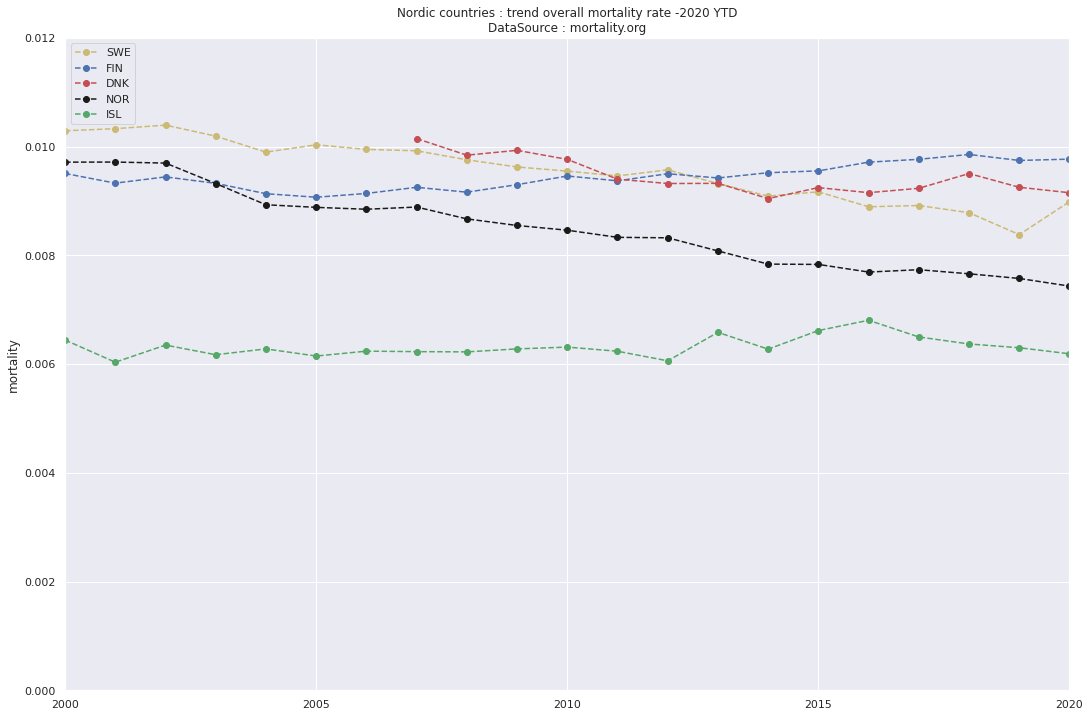

In [69]:
title = 'Nordic countries : trend overall mortality rate -2020 YTD\nDataSource : mortality.org'

ax = swe['all_age_grp'].plot(style='yo--',figsize=(18,12),label='SWE',title=title)
fin['all_age_grp'].plot(style='bo--',ax=ax,label='FIN')
den['all_age_grp'].plot(style='ro--',ax=ax,label='DNK')
nor['all_age_grp'].plot(style='ko--',ax=ax,label='NOR')
isl['all_age_grp'].plot(style='go--',ax=ax,label='ISL')

ax.set_ylabel('mortality')

ax.set_ylim([0,0.012])
plt.legend(loc='upper left')
plt.savefig('nordic_mortality_trend.jpg',format='jpg')

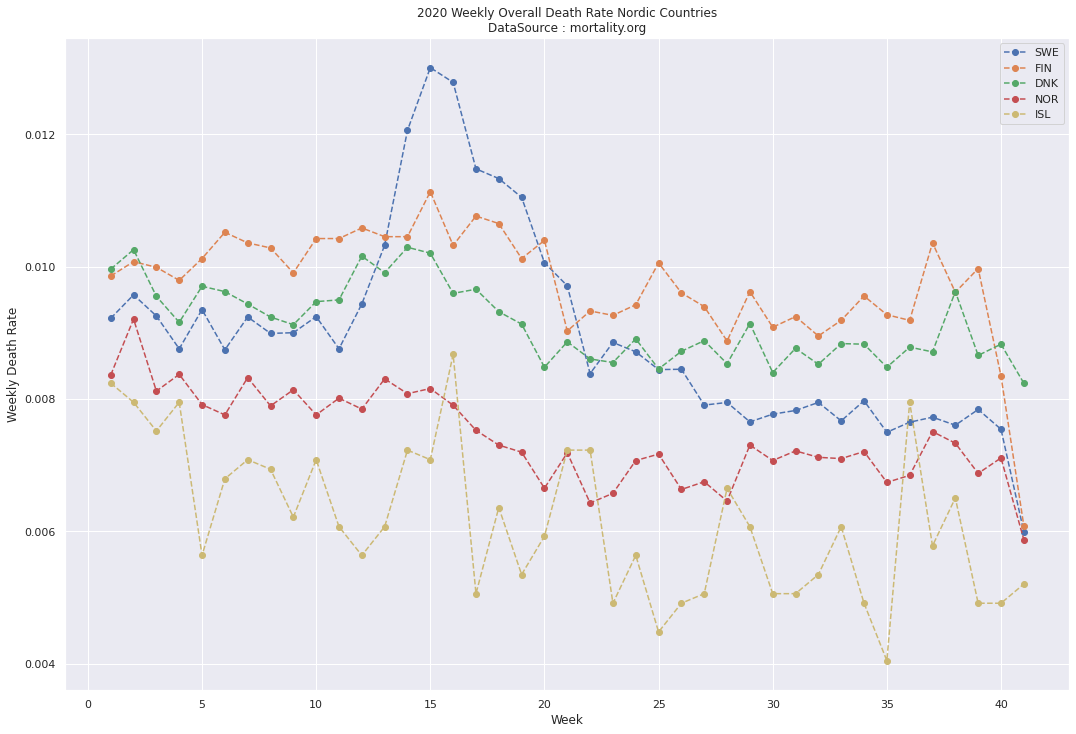

In [70]:
swe_2020 = df_2020.loc[df_2020['Country'] == 'SWE']
fin_2020 = df_2020.loc[df_2020['Country'] == 'FIN']
den_2020 = df_2020.loc[df_2020['Country'] == 'DNK']
nor_2020 = df_2020.loc[df_2020['Country'] == 'NOR']
isl_2020 = df_2020.loc[df_2020['Country'] == 'ISL']

ax = swe_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='SWE',figsize=(18,12),
             title='2020 Weekly Overall Death Rate Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='FIN',ax=ax)
den_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='DNK',ax=ax)
nor_2020.plot(x='Week',y='all_age_grp',style=['o--'],label='NOR',ax=ax)
isl_2020.plot(x='Week',y='all_age_grp',style=['yo--'],label='ISL',ax=ax)



plt.ylabel('Weekly Death Rate')
plt.savefig('mortality_org_overall_death_rate_nor_2020dics.jpg',format='jpg')

In [71]:
swe_2020.tail()

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3230,SWE,2020,37,b,10,145,242,468,661,1526,0.000285,0.001184,0.011505,0.033806,0.130963,0.007727,0,0,1
3233,SWE,2020,38,b,7,145,268,436,646,1502,0.000200,0.001184,0.012741,0.031494,0.127991,0.007605,0,0,1
3236,SWE,2020,39,b,4,143,229,485,688,1549,0.000114,0.001167,0.010887,0.035034,0.136312,0.007843,0,0,1
3239,SWE,2020,40,b,3,150,248,461,628,1490,0.000086,0.001225,0.011790,0.033300,0.124424,0.007544,0,0,1
3242,SWE,2020,41,b,11,107,193,374,499,1184,0.000314,0.000874,0.009175,0.027016,0.098866,0.005995,0,0,1


Text(0, 0.5, 'Weekly Death Rate')

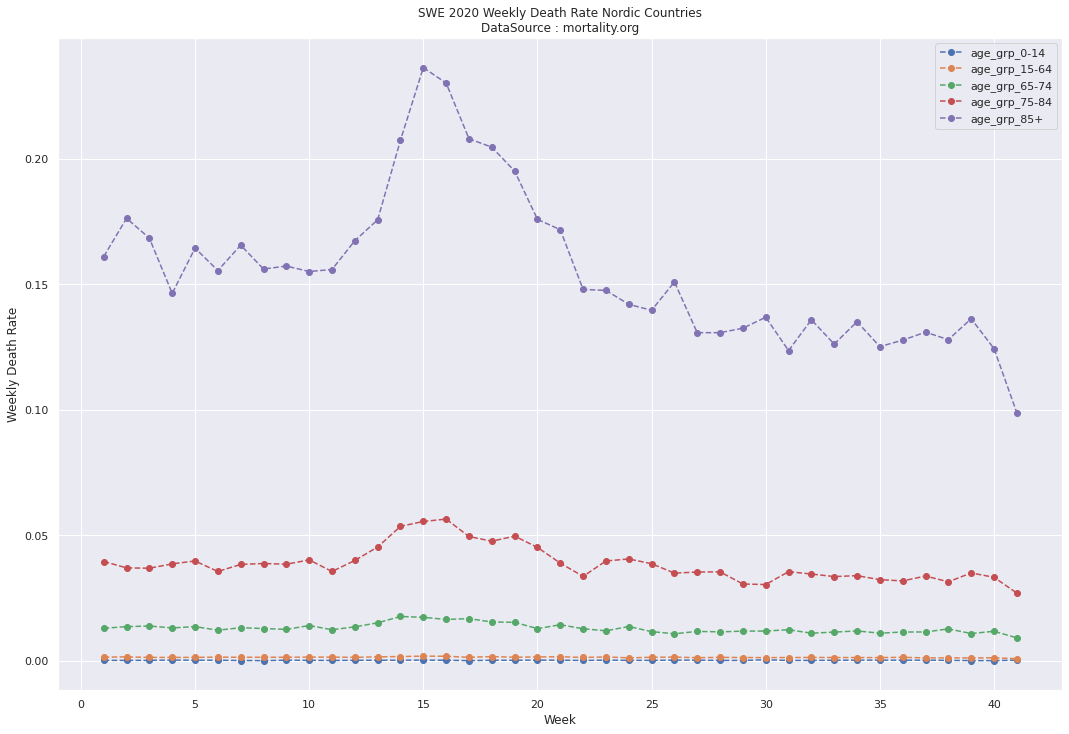

In [72]:
ax = swe_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='SWE 2020 Weekly Death Rate Nordic Countries\nDataSource : mortality.org')

plt.ylabel('Weekly Death Rate')

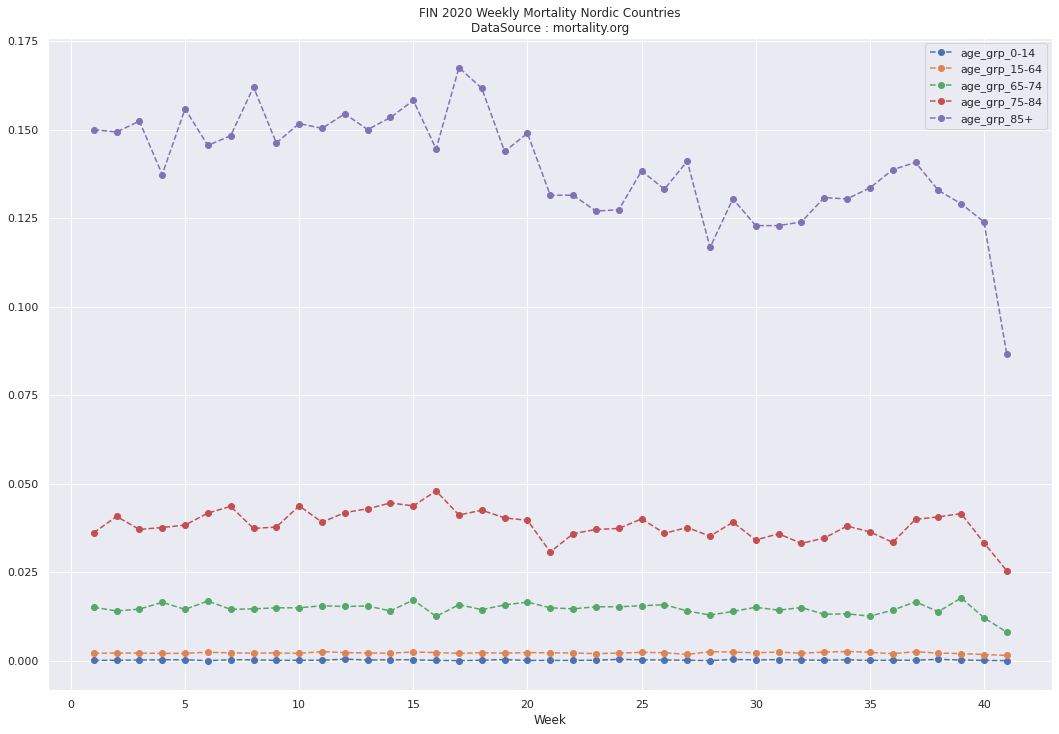

In [73]:
ax = fin_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='FIN 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

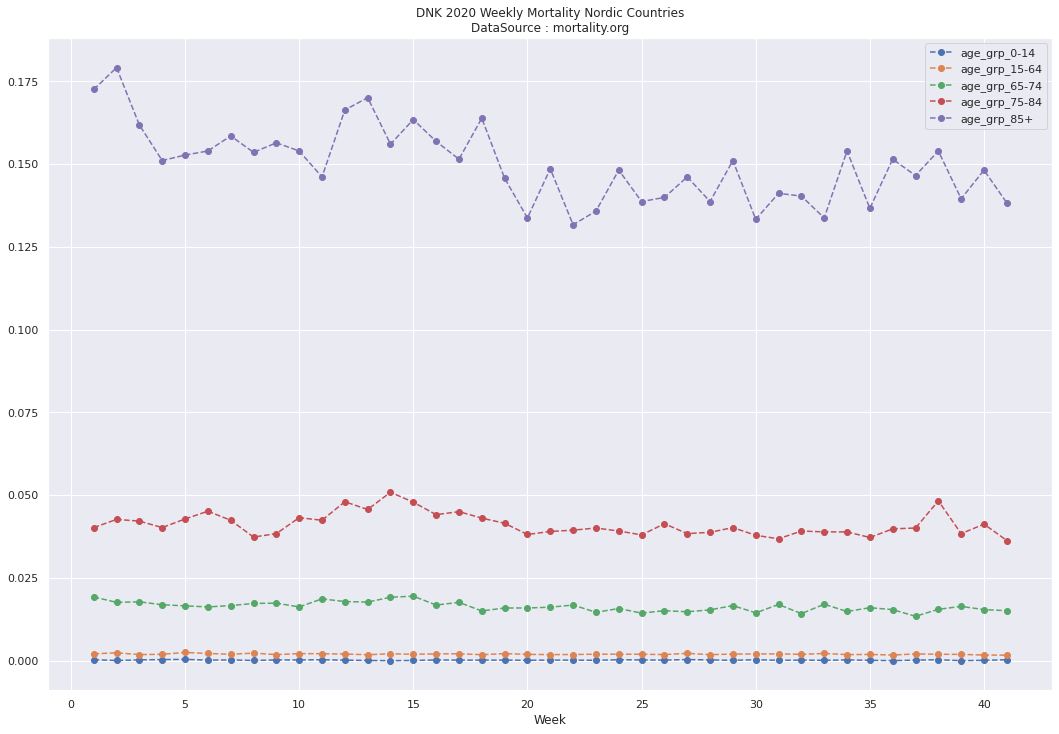

In [74]:
ax = den_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='DNK 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

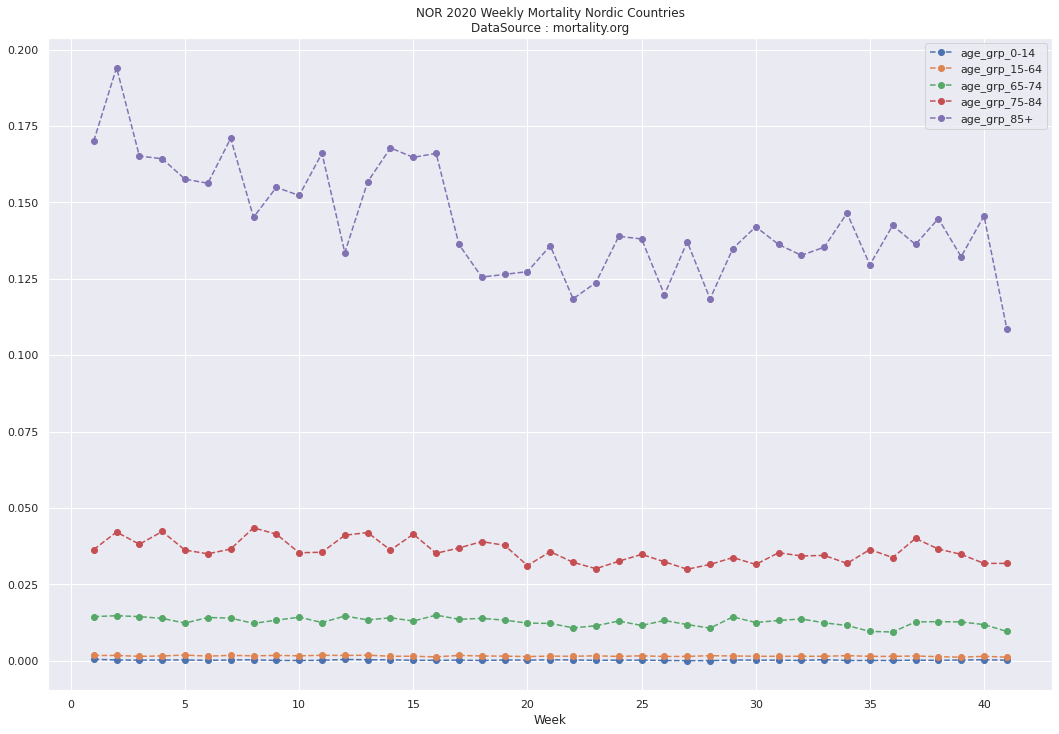

In [75]:
ax = nor_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='NOR 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

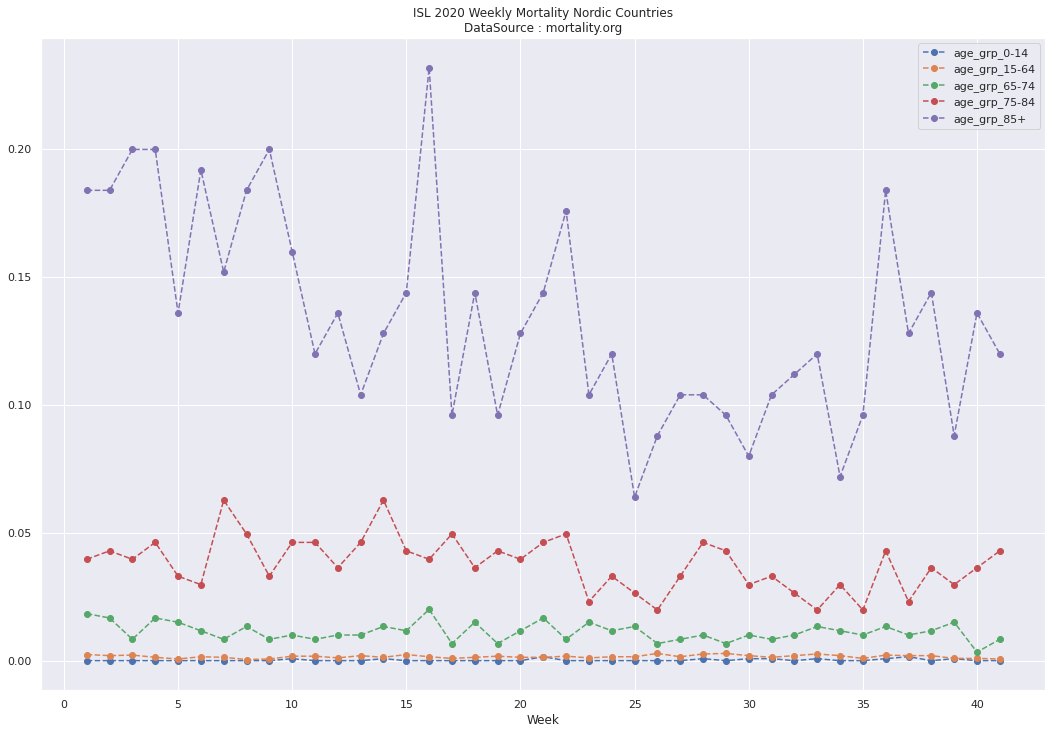

In [76]:
ax = isl_2020.plot(x='Week',y=['age_grp_0-14','age_grp_15-64','age_grp_65-74',
                         'age_grp_75-84','age_grp_85+'],style=['o--'] * 5,figsize=(18,12),
             title='ISL 2020 Weekly Mortality Nordic Countries\nDataSource : mortality.org')

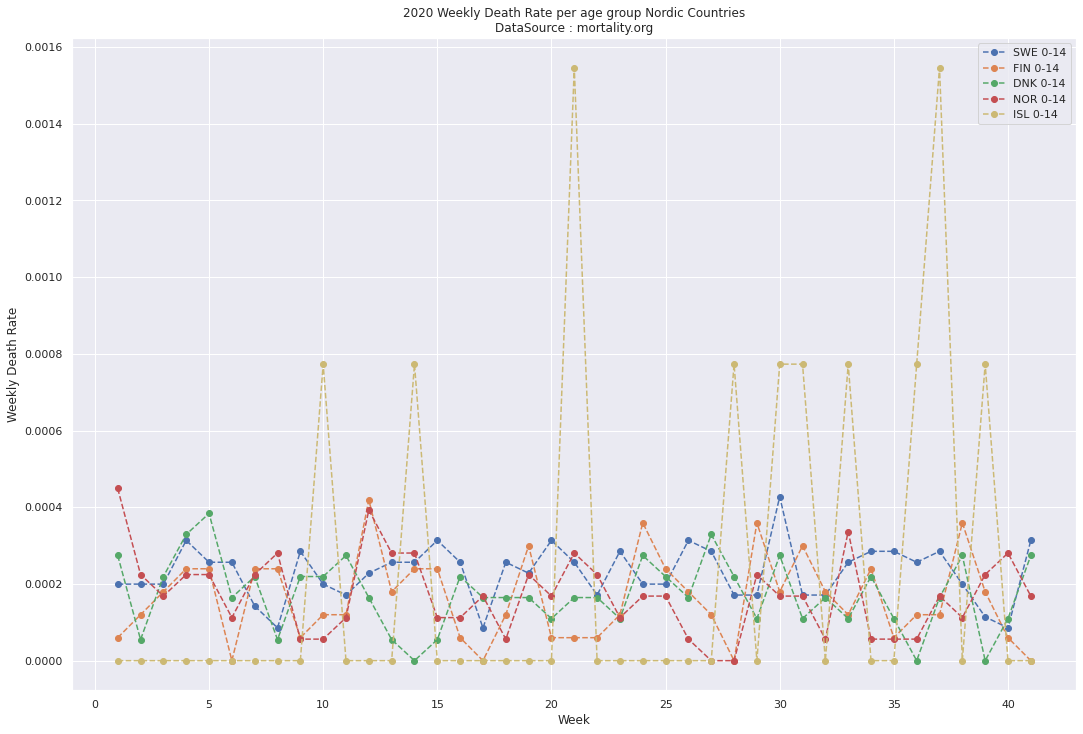

In [77]:
ax = swe_2020.plot(x='Week',y='age_grp_0-14',style='o--',figsize=(18,12),label='SWE 0-14',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='FIN 0-14')
den_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='DNK 0-14')
nor_2020.plot(x='Week',y='age_grp_0-14',style='o--',ax=ax,label='NOR 0-14')
isl_2020.plot(x='Week',y='age_grp_0-14',style='yo--',ax=ax,label='ISL 0-14')

plt.ylabel('Weekly Death Rate')
plt.savefig ('mortality_org_0_14.jpg',format='jpg')

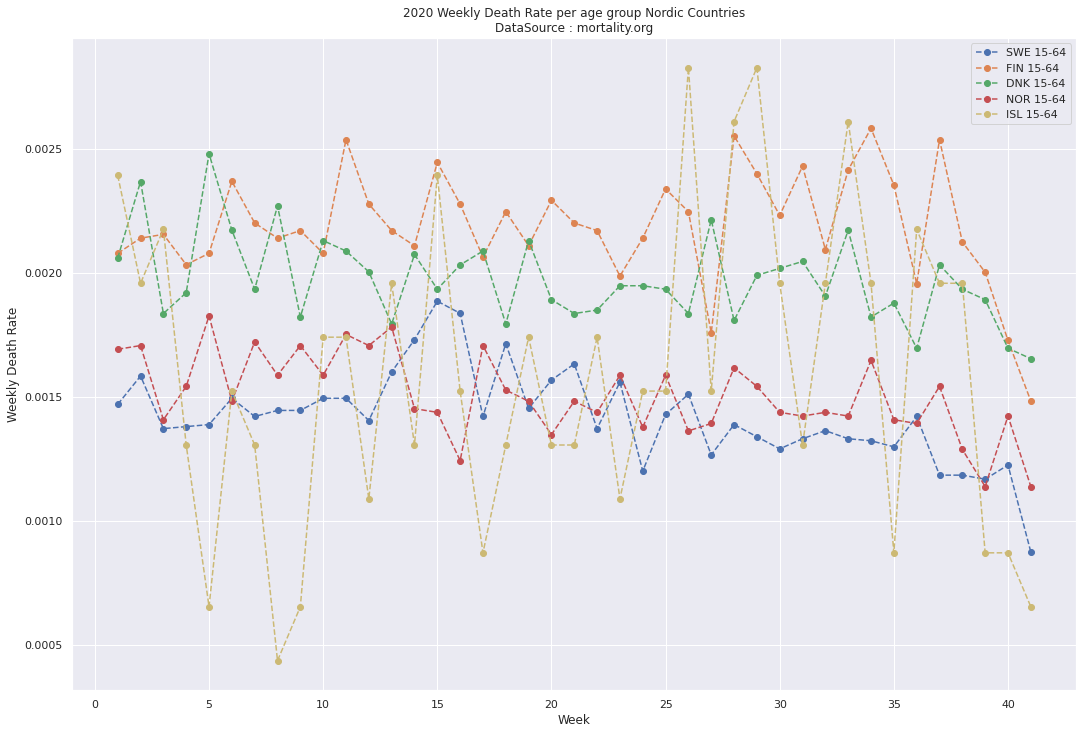

In [78]:
ax = swe_2020.plot(x='Week',y='age_grp_15-64',style='o--',figsize=(18,12),label='SWE 15-64',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='FIN 15-64')
den_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='DNK 15-64')
nor_2020.plot(x='Week',y='age_grp_15-64',style='o--',ax=ax,label='NOR 15-64')
isl_2020.plot(x='Week',y='age_grp_15-64',style='yo--',ax=ax,label='ISL 15-64')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_15_64.jpg',format='jpg')

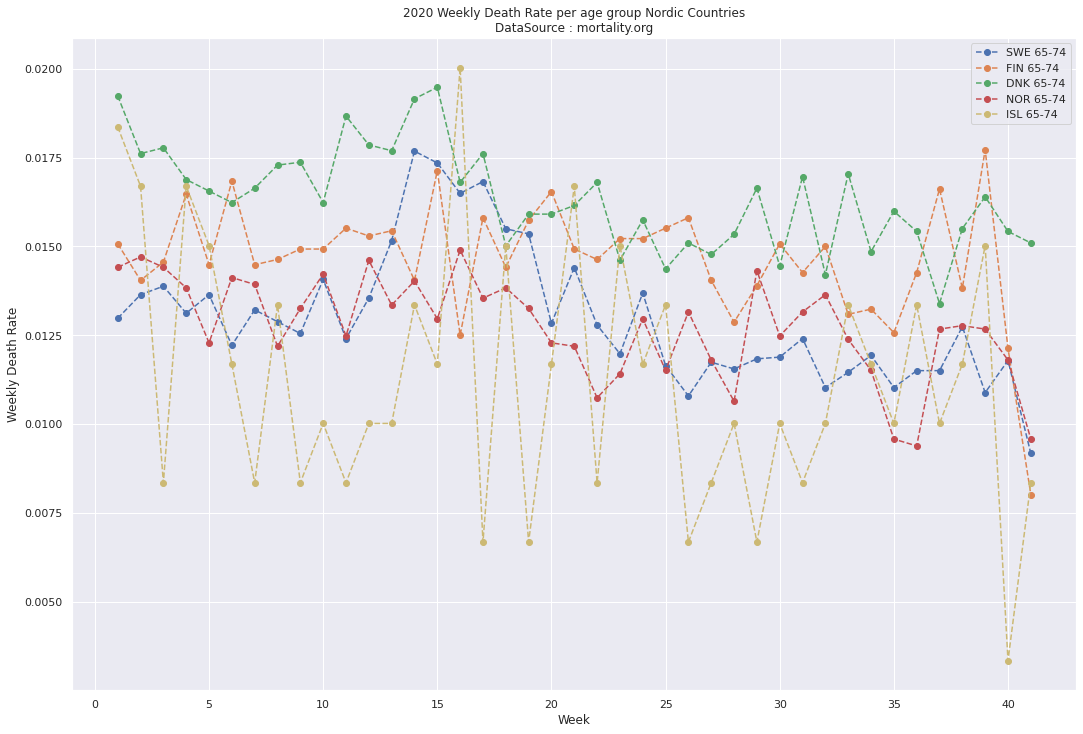

In [79]:
ax = swe_2020.plot(x='Week',y='age_grp_65-74',style='o--',figsize=(18,12),label='SWE 65-74',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='FIN 65-74')
den_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='DNK 65-74')
nor_2020.plot(x='Week',y='age_grp_65-74',style='o--',ax=ax,label='NOR 65-74')
isl_2020.plot(x='Week',y='age_grp_65-74',style='yo--',ax=ax,label='ISL 65-74')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_65_74.jpg',format='jpg')

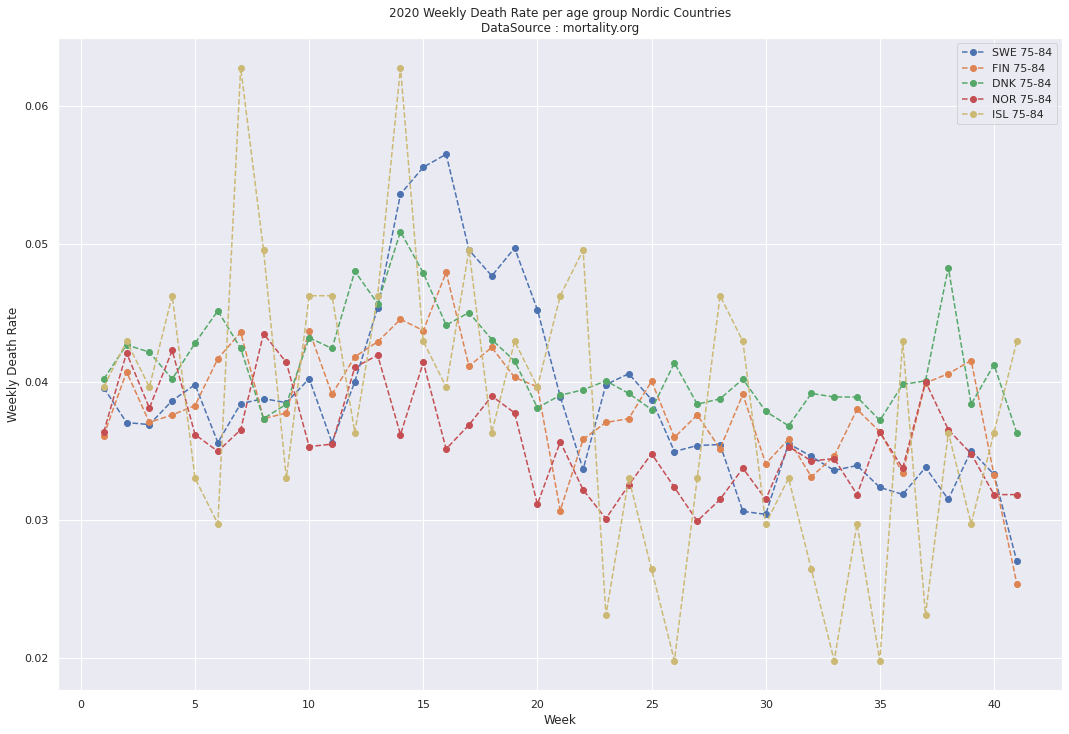

In [80]:
ax = swe_2020.plot(x='Week',y='age_grp_75-84',style='o--',figsize=(18,12),label='SWE 75-84',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='FIN 75-84')
den_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='DNK 75-84')
nor_2020.plot(x='Week',y='age_grp_75-84',style='o--',ax=ax,label='NOR 75-84')
isl_2020.plot(x='Week',y='age_grp_75-84',style='yo--',ax=ax,label='ISL 75-84')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_75_84.jpg',format='jpg')

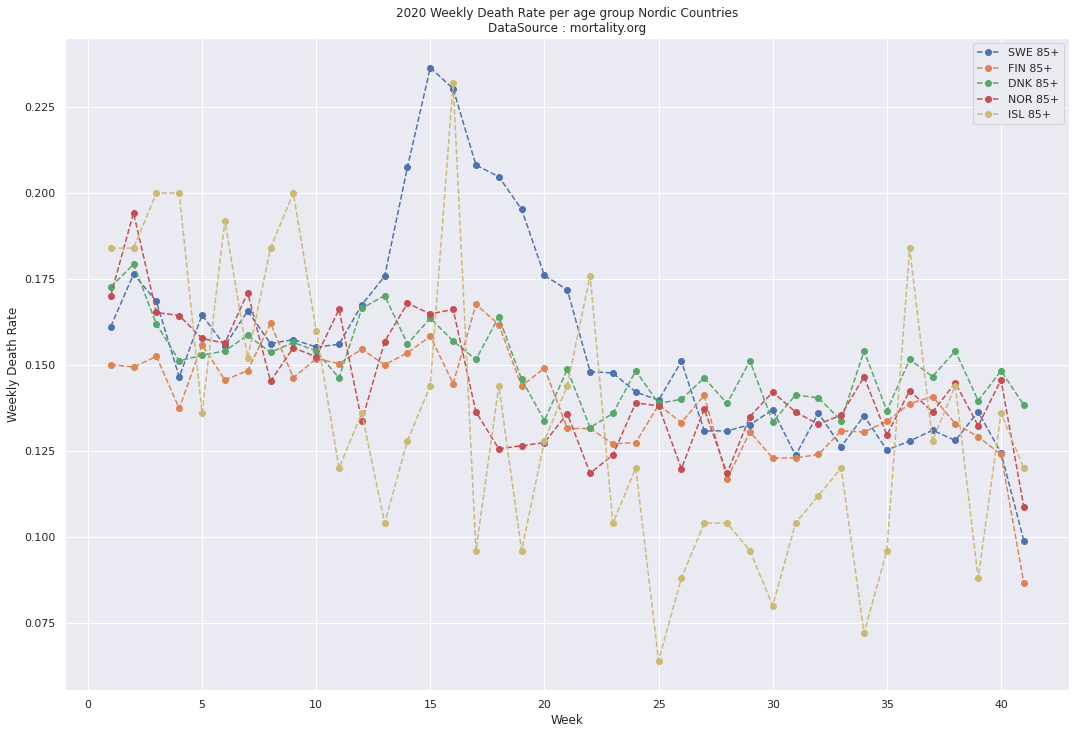

In [81]:
ax = swe_2020.plot(x='Week',y='age_grp_85+',style='o--',figsize=(18,12),label='SWE 85+',
             title='2020 Weekly Death Rate per age group Nordic Countries\nDataSource : mortality.org')

fin_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='FIN 85+')
den_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='DNK 85+')
nor_2020.plot(x='Week',y='age_grp_85+',style='o--',ax=ax,label='NOR 85+')
isl_2020.plot(x='Week',y='age_grp_85+',style='yo--',ax=ax,label='ISL 85+')

plt.ylabel('Weekly Death Rate')

plt.savefig('mortality_org_85+.jpg',format='jpg')

In [82]:
swe_2020['Total'].sum() / (10.23e6 * 37/52)



0.01000695358114713

In [83]:
swe_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000200,0.001469,0.012978,0.039584,0.161078,0.009220,0,0,1
3125,SWE,2020,2,b,7,194,287,513,890,1891,0.000200,0.001584,0.013644,0.037056,0.176334,0.009575,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000200,0.001371,0.013882,0.036912,0.168409,0.009256,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000314,0.001380,0.013121,0.038645,0.146417,0.008759,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000257,0.001388,0.013644,0.039801,0.164446,0.009352,0,0,1
3137,SWE,2020,6,b,9,183,257,493,785,1727,0.000257,0.001494,0.012218,0.035611,0.155530,0.008744,0,0,1
3140,SWE,2020,7,b,5,174,278,532,836,1825,0.000143,0.001420,0.013216,0.038429,0.165635,0.009240,0,0,1
3143,SWE,2020,8,b,3,177,271,537,788,1776,0.000086,0.001445,0.012883,0.038790,0.156125,0.008992,0,0,1
3146,SWE,2020,9,b,10,177,264,533,794,1778,0.000285,0.001445,0.012551,0.038501,0.157314,0.009002,0,0,1
3149,SWE,2020,10,b,7,183,296,557,783,1826,0.000200,0.001494,0.014072,0.040234,0.155134,0.009245,0,0,1


In [84]:
swe_2020['Total'] / 10.23e6 *52

3122    0.009256
3125    0.009612
3128    0.009292
3131    0.008794
3134    0.009388
3137    0.008778
3140    0.009277
3143    0.009028
3146    0.009038
3149    0.009282
3152    0.008794
3155    0.009475
3158    0.010364
3161    0.012108
3164    0.013058
3167    0.012835
3170    0.011523
3173    0.011376
3176    0.011091
3179    0.010100
3182    0.009749
3185    0.008418
3188    0.008890
3191    0.008748
3194    0.008479
3197    0.008484
3200    0.007940
3203    0.007980
3206    0.007686
3209    0.007803
3212    0.007858
3215    0.007980
3218    0.007701
3221    0.008006
3224    0.007528
3227    0.007681
3230    0.007757
3233    0.007635
3236    0.007874
3239    0.007574
3242    0.006018
Name: Total, dtype: float64

In [85]:
def age_grp_mean(col):
    return col.mean()

age_grp_mean(swe_2020['age_grp_0-14'])
age_grp_mean(swe_2020['age_grp_15-64'])
age_grp_mean(swe_2020['age_grp_65-74'])
age_grp_mean(swe_2020['age_grp_75-84'])
age_grp_mean(swe_2020['age_grp_85+'])

0.15577694538419962

In [86]:
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000200,0.001469,0.012978,0.039584,0.161078,0.009220,0,0,1
3125,SWE,2020,2,b,7,194,287,513,890,1891,0.000200,0.001584,0.013644,0.037056,0.176334,0.009575,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000200,0.001371,0.013882,0.036912,0.168409,0.009256,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000314,0.001380,0.013121,0.038645,0.146417,0.008759,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000257,0.001388,0.013644,0.039801,0.164446,0.009352,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
3233,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
3236,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
3239,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


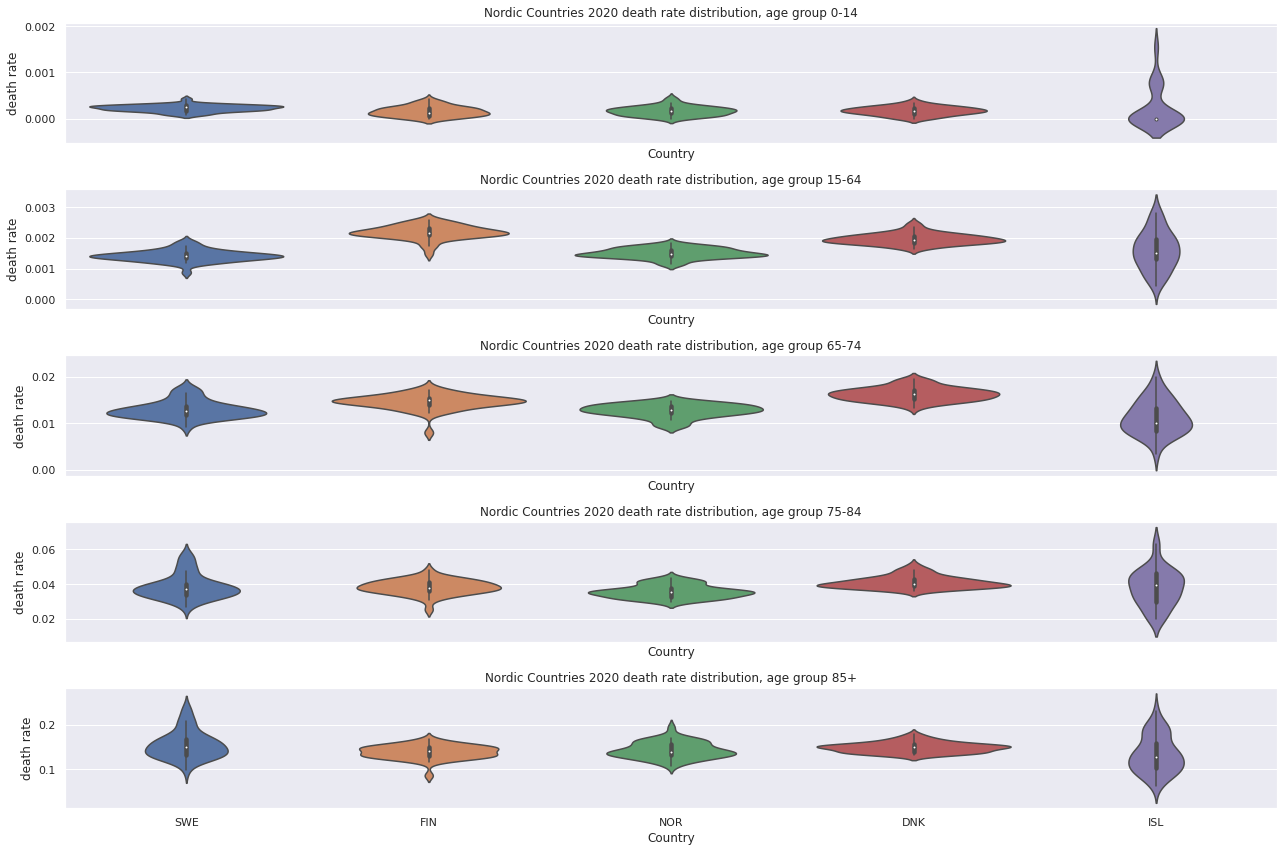

In [87]:
fig,axes = plt.subplots(5,1,figsize=(18,12),sharex=True)


title='Nordic Countries 2020 death rate distribution, age group 0-14'
sns.violinplot(x='Country',y='age_grp_0-14',data=df_2020,ax=axes[0])
axes[0].set_title(title)
axes[0].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 15-64'
sns.violinplot(x='Country',y='age_grp_15-64',data=df_2020,ax=axes[1])
axes[1].set_title(title)
axes[1].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 65-74'
sns.violinplot(x='Country',y='age_grp_65-74',data=df_2020,ax=axes[2])
axes[2].set_title(title)
axes[2].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 75-84'
sns.violinplot(x='Country',y='age_grp_75-84',data=df_2020,ax=axes[3])
axes[3].set_title(title)
axes[3].set_ylabel('death rate')

title='Nordic Countries 2020 death rate distribution, age group 85+'
sns.violinplot(x='Country',y='age_grp_85+',data=df_2020,ax=axes[4])
axes[4].set_title(title)
axes[4].set_ylabel('death rate')

plt.tight_layout()

plt.savefig('nor_2020dic_death_rate_distr.jpg',format='jpg')

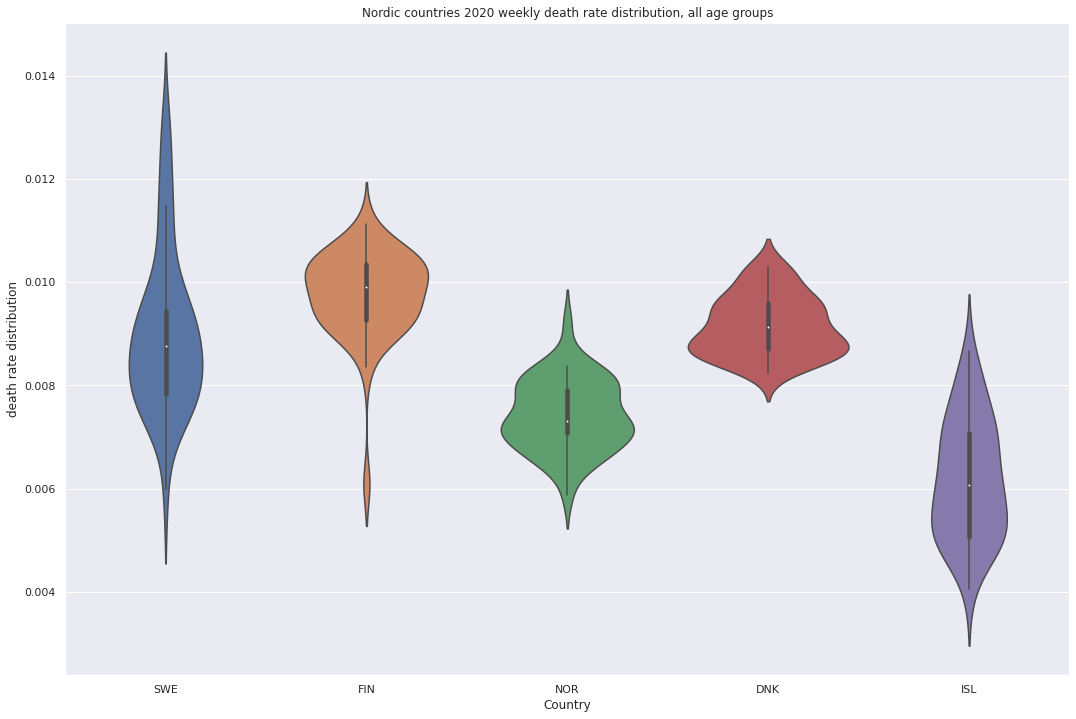

In [88]:
plt.figure(figsize=(18,12))
plt.title('Nordic countries 2020 weekly death rate distribution, all age groups')
sns.violinplot(x='Country',y='all_age_grp',data=df_2020)
plt.ylabel('death rate distribution')

plt.savefig('nor_2020dic_death_distr_all_ages.jpg',format='jpg')

In [89]:

transaction_df = df_2020[['Country','age_grp_0-14','age_grp_15-64']].copy()
#transaction_df['age_grp_0-14'].apply()

In [90]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [91]:
df_timeline = df_timeline.loc['2007-01-01' :]
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,0.000303,0.002041,0.019510,0.054099,0.181210,0.011134,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,0.000337,0.001990,0.014665,0.054933,0.178814,0.010674,0,0,0
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,0.000269,0.002119,0.015713,0.054377,0.169666,0.010566,0,0,0
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,0.000303,0.002119,0.015778,0.055859,0.167924,0.010622,0,0,0
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,0.000303,0.002301,0.016957,0.052339,0.168795,0.010651,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
2020-09-27,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
2020-10-04,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
2020-10-11,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


In [92]:
unique_countries = df_timeline['Country'].unique()
country_idx_map = dict(zip(unique_countries,range(len(unique_countries))))
country_idx_map

{'SWE': 0, 'FIN': 1, 'NOR': 2, 'DNK': 3, 'ISL': 4}

In [93]:
unique_dates = np.unique(df_timeline.index)
date_idx_map = dict(zip(pd.to_datetime(unique_dates),range(len(unique_dates))))


In [94]:
df_timeline['country_idx'] = df_timeline['Country'].apply(lambda x : country_idx_map[x])
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,0.000303,0.002041,0.019510,0.054099,0.181210,0.011134,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,0.000337,0.001990,0.014665,0.054933,0.178814,0.010674,0,0,0,0
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,0.000269,0.002119,0.015713,0.054377,0.169666,0.010566,0,0,0,0
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,0.000303,0.002119,0.015778,0.055859,0.167924,0.010622,0,0,0,0
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,0.000303,0.002301,0.016957,0.052339,0.168795,0.010651,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1,4
2020-09-27,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1,4
2020-10-04,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1,4
2020-10-11,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1,4


In [95]:
week_idx = df_timeline.reset_index()['index'].apply(lambda x : date_idx_map[x])

In [96]:
df_timeline['week_idx'] = week_idx.values
df_timeline

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,...,0.002041,0.019510,0.054099,0.181210,0.011134,0,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,...,0.001990,0.014665,0.054933,0.178814,0.010674,0,0,0,0,1
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,...,0.002119,0.015713,0.054377,0.169666,0.010566,0,0,0,0,2
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,...,0.002119,0.015778,0.055859,0.167924,0.010622,0,0,0,0,3
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,...,0.002301,0.016957,0.052339,0.168795,0.010651,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,ISL,2020,37,b,2,9,6,7,16,40,...,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1,4,712
2020-09-27,ISL,2020,38,b,0,9,7,11,18,45,...,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1,4,713
2020-10-04,ISL,2020,39,b,1,4,9,9,11,34,...,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1,4,714
2020-10-11,ISL,2020,40,b,0,4,2,11,17,34,...,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1,4,715


In [97]:
df_timeline.loc[df_timeline['Country'] == 'NOR']

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,NOR,2007,1,b,6,145,107,273,357,888,...,0.002421,0.016700,0.056342,0.177668,0.009804,0,0,0,2,0
2007-01-14,NOR,2007,2,b,2,131,104,281,389,907,...,0.002187,0.016231,0.057993,0.193593,0.010013,0,0,0,2,1
2007-01-21,NOR,2007,3,b,4,127,108,266,326,831,...,0.002121,0.016856,0.054898,0.162240,0.009174,0,0,0,2,2
2007-01-28,NOR,2007,4,b,4,123,136,253,352,868,...,0.002054,0.021226,0.052215,0.175179,0.009583,0,0,0,2,3
2007-02-04,NOR,2007,5,b,9,120,114,269,370,882,...,0.002004,0.017792,0.055517,0.184137,0.009737,0,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,NOR,2020,37,b,3,103,131,230,306,773,...,0.001542,0.012674,0.040018,0.136251,0.007509,0,0,1,2,712
2020-09-27,NOR,2020,38,b,2,86,132,210,325,755,...,0.001288,0.012771,0.036538,0.144711,0.007334,0,0,1,2,713
2020-10-04,NOR,2020,39,b,4,76,131,200,297,708,...,0.001138,0.012674,0.034798,0.132244,0.006877,0,0,1,2,714
2020-10-11,NOR,2020,40,b,5,95,122,183,327,732,...,0.001422,0.011804,0.031841,0.145602,0.007110,0,0,1,2,715


In [98]:
last_date = df_timeline.index.max().date()
last_date

datetime.date(2020, 10, 18)

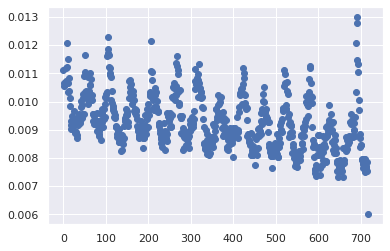

In [99]:
plt.scatter(df_timeline.loc[df_timeline['Country'] == 'SWE']['week_idx'],
            df_timeline.loc[df_timeline['Country']=='SWE']['all_age_grp'])

In [100]:

x = df_timeline['week_idx'].values
x

array([  0,   1,   2, ..., 714, 715, 716])

In [101]:
def standardize(series):
    return (series - series.mean()) / series.std()

model = pm.Model()
scale_outcome = 1000


def regression(outcome='all_age_grp'):

    week_idx = df_timeline['week_idx'].values
    country_idx = df_timeline['country_idx'].values


    
    with model:

        alpha = pm.Normal('alpha',0,1,shape=len(unique_countries))
        beta = pm.Normal('beta',0, 1,shape=len(unique_countries))

        sigma = pm.Uniform('sigma',0,5)

        mu = pm.Deterministic('mu',alpha[country_idx] + standardize(x) * beta[country_idx])

        obs = pm.Normal('obs',mu,sigma,observed=df_timeline[outcome] * scale_outcome) 

        trace = pm.sample(2000,tune=2000)
        
        return trace

In [102]:
df_timeline.head()

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,...,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast,country_idx,week_idx
2007-01-07,SWE,2007,1,b,9,236,298,584,832,1959,...,0.002041,0.019510,0.054099,0.181210,0.011134,0,0,0,0,0
2007-01-14,SWE,2007,2,b,10,230,224,593,821,1878,...,0.001990,0.014665,0.054933,0.178814,0.010674,0,0,0,0,1
2007-01-21,SWE,2007,3,b,8,245,240,587,779,1859,...,0.002119,0.015713,0.054377,0.169666,0.010566,0,0,0,0,2
2007-01-28,SWE,2007,4,b,9,245,241,603,771,1869,...,0.002119,0.015778,0.055859,0.167924,0.010622,0,0,0,0,3
2007-02-04,SWE,2007,5,b,9,266,259,565,775,1874,...,0.002301,0.016957,0.052339,0.168795,0.010651,0,0,0,0,4


In [103]:
outcome = 'age_grp_85+'

trace=regression(outcome)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


In [104]:
with model:
    print (az.summary(trace,var_names=['~mu'],hdi_prob=0.89))

             mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_mean  \
alpha[0]  149.606  0.180   149.316    149.891      0.003    0.002    4212.0   
alpha[1]  142.247  0.186   141.961    142.551      0.003    0.002    4072.0   
alpha[2]  147.063  0.185   146.765    147.359      0.003    0.002    4615.0   
alpha[3]  151.548  0.182   151.251    151.830      0.003    0.002    4881.0   
alpha[4]  142.790  0.176   142.496    143.058      0.003    0.002    4642.0   
beta[0]    -2.914  0.187    -3.218     -2.626      0.003    0.002    4667.0   
beta[1]    -2.911  0.180    -3.195     -2.624      0.002    0.002    5227.0   
beta[2]    -3.250  0.185    -3.533     -2.956      0.003    0.002    4357.0   
beta[3]    -3.501  0.188    -3.802     -3.201      0.003    0.002    4743.0   
beta[4]    -3.345  0.182    -3.638     -3.060      0.003    0.002    5048.0   
sigma       5.000  0.000     5.000      5.000      0.000    0.000    3724.0   

          ess_sd  ess_bulk  ess_tail  r_hat  
alpha

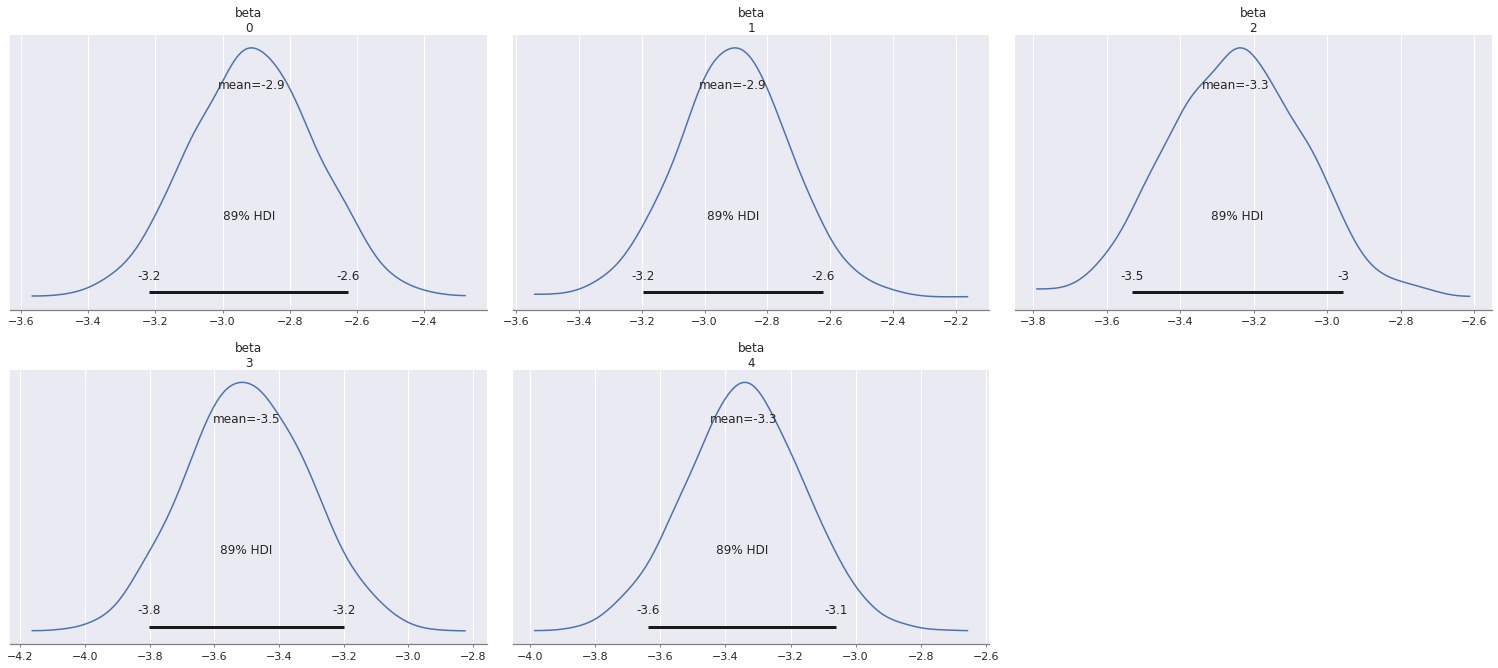

In [105]:
with model:
    az.plot_posterior(trace,var_names=['beta'],hdi_prob=0.89)

In [106]:
def plot_reg(outcome):
    
    fin_beta = trace['beta'][:,1].mean() / scale_outcome
    fin_alpha = trace['alpha'][:,1].mean() / scale_outcome
    swe_beta = trace['beta'][:,0].mean() / scale_outcome
    swe_alpha = trace['alpha'][:,0].mean() / scale_outcome
    nor_beta = trace['beta'][:,2].mean() / scale_outcome
    nor_alpha = trace['alpha'][:,2].mean() / scale_outcome
    den_beta = trace['beta'][:,3].mean() / scale_outcome
    den_alpha = trace['alpha'][:,3].mean() / scale_outcome
    isl_beta = trace['beta'][:,4].mean() / scale_outcome
    isl_alpha = trace['alpha'][:,4].mean() / scale_outcome
    
    
    fin_hdi_kwargs = {'color':'lightblue','alpha':1.0,'label' : 'FIN'}
    swe_hdi_kwargs = {'color' : 'yellow','alpha' : 1.0,'label' : 'SWE'}
    den_hdi_kwargs = {'color' : 'orange','alpha' : 1.0,'label' : 'DNK'}
    nor_hdi_kwargs = {'color' : 'lime','alpha' : 1.0,'label' : 'NOR'}
    isl_hdi_kwargs = {'color' : 'cyan','alpha' : 1.0,'label' : 'ISL'}

    numeric_timeline = df_timeline.reset_index().copy()

    hdi_swe_x = numeric_timeline.loc[numeric_timeline['Country'] == 'SWE']['week_idx']
    hdi_fin_x = numeric_timeline.loc[numeric_timeline['Country'] == 'FIN']['week_idx']
    hdi_den_x = numeric_timeline.loc[numeric_timeline['Country'] == 'DNK']['week_idx']
    hdi_nor_x = numeric_timeline.loc[numeric_timeline['Country'] == 'NOR']['week_idx']
    hdi_isl_x = numeric_timeline.loc[numeric_timeline['Country'] == 'ISL']['week_idx']


    swe_num = numeric_timeline.loc[numeric_timeline['Country'] == 'SWE']
    swe_idx = swe_num.index.values
    hdi_swe_mu = trace['mu'][:,swe_idx]

    fin_num = numeric_timeline.loc[numeric_timeline['Country'] == 'FIN']
    fin_idx = fin_num.index.values
    hdi_fin_mu = trace['mu'][:,fin_idx]

    den_num = numeric_timeline.loc[numeric_timeline['Country'] == 'DNK']
    den_idx = den_num.index.values
    hdi_den_mu = trace['mu'][:,den_idx]

    nor_num = numeric_timeline.loc[numeric_timeline['Country'] == 'NOR']
    nor_idx = nor_num.index.values
    hdi_nor_mu = trace['mu'][:,nor_idx]

    isl_num = numeric_timeline.loc[numeric_timeline['Country'] == 'ISL']
    isl_idx = isl_num.index.values
    hdi_isl_mu = trace['mu'][:,isl_idx]

    fig,axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(18,12))

    plt.suptitle('Nordic countries : mortality trends for [{}]'.format(outcome) +\
                 ' based on weekly death rates Jan 2007 - {}'.format(last_date))


    axes[0,0].plot(hdi_swe_x,
            (trace['alpha'][0,0].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'SWE']['week_idx']) * trace['beta'][:,0].mean()) / scale_outcome,
            '--',color='k',lw=1)



    axes[0,0].scatter(df_timeline.loc[df_timeline['Country'] == 'SWE']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='SWE'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_swe_x,hdi_swe_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,0],fill_kwargs=swe_hdi_kwargs)
    
    axes[0,0].axvline(x.mean(),ls='dashed',color='orange')

    ##

    axes[0,1].plot(hdi_fin_x,
            (trace['alpha'][:,1].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'FIN']['week_idx']) * trace['beta'][:,1].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[0,1].scatter(df_timeline.loc[df_timeline['Country'] == 'FIN']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='FIN'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_fin_x,hdi_fin_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,1],fill_kwargs=fin_hdi_kwargs)
    
    axes[0,1].axvline(x.mean(),ls='dashed',color='orange')


    ##

    axes[0,2].plot(hdi_den_x,
            (trace['alpha'][:,3].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'DNK']['week_idx']) * trace['beta'][:,3].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[0,2].scatter(df_timeline.loc[df_timeline['Country'] == 'DNK']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='DNK'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_den_x,hdi_den_mu / scale_outcome,hdi_prob=0.89,ax=axes[0,2],fill_kwargs=den_hdi_kwargs)
    
    axes[0,2].axvline(x.mean(),ls='dashed',color='orange')


    ##
    axes[1,0].plot(hdi_nor_x,
            (trace['alpha'][:,2].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'NOR']['week_idx']) * trace['beta'][:,2].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[1,0].scatter(df_timeline.loc[df_timeline['Country'] == 'NOR']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='NOR'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_nor_x,hdi_nor_mu / scale_outcome,hdi_prob=0.89,ax=axes[1,0],fill_kwargs=nor_hdi_kwargs)
    
    axes[1,0].axvline(x.mean(),ls='dashed',color='orange')


    ##

    axes[1,1].plot(hdi_isl_x,
            (trace['alpha'][:,4].mean() + \
               standardize(numeric_timeline.loc[numeric_timeline['Country'] \
                                           == 'ISL']['week_idx']) * trace['beta'][:,4].mean()) / scale_outcome,
            '--',color='k',lw=1)


    axes[1,1].scatter(df_timeline.loc[df_timeline['Country'] == 'ISL']['week_idx'],
                df_timeline.loc[df_timeline['Country']=='ISL'][outcome],color='lightgrey',alpha=0.3)

    az.plot_hdi(hdi_isl_x,hdi_isl_mu / scale_outcome,hdi_prob=0.89,ax=axes[1,1],fill_kwargs=isl_hdi_kwargs)
    
    axes[1,1].axvline(x.mean(),ls='dashed',color='orange')


    plt.legend(loc='upper center')

    axes[1,0].set_xlabel('week number')
    axes[1,1].set_xlabel('week_number')
    axes[1,2].set_xlabel('week_number')

    axes[0,0].set_title(r'SWE $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(swe_alpha,swe_beta))
    axes[0,1].set_title(r'FIN $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(fin_alpha,fin_beta))
    axes[0,2].set_title(r'DNK $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(den_alpha,den_beta))
    axes[1,0].set_title(r'NOR $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(nor_alpha,nor_beta))
    axes[1,1].set_title(r'ISL $\alpha$ : {:.4f}   $\beta$ : {:.6f}'.format(isl_alpha,isl_beta))

    axes[1,2].axis('off')

    plt.savefig('nordic_mortality_bayesian_trends_{}.jpg'.format(outcome),format='jpg')



/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/a

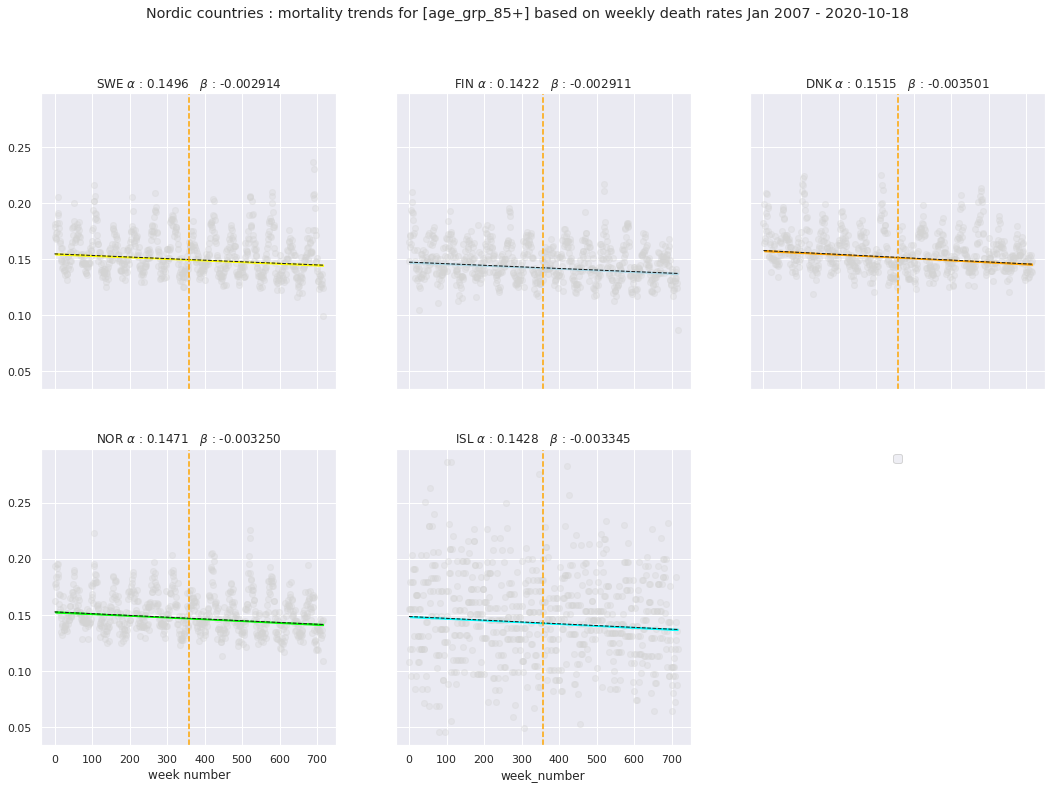

In [107]:
# reported alpha's dont cross at 0 b/c x vals are standardized in calculation : mean at about week 350
plot_reg(outcome)

In [108]:
df_2020

,Country,Year,Week,Sex,0-14,15-64,65-74,75-84,85+,Total,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp,Split,SplitSex,Forecast
3122,SWE,2020,1,b,7,180,273,548,813,1821,0.000200,0.001469,0.012978,0.039584,0.161078,0.009220,0,0,1
3125,SWE,2020,2,b,7,194,287,513,890,1891,0.000200,0.001584,0.013644,0.037056,0.176334,0.009575,0,0,1
3128,SWE,2020,3,b,7,168,292,511,850,1828,0.000200,0.001371,0.013882,0.036912,0.168409,0.009256,0,0,1
3131,SWE,2020,4,b,11,169,276,535,739,1730,0.000314,0.001380,0.013121,0.038645,0.146417,0.008759,0,0,1
3134,SWE,2020,5,b,9,170,287,551,830,1847,0.000257,0.001388,0.013644,0.039801,0.164446,0.009352,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,ISL,2020,37,b,2,9,6,7,16,40,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783,0,0,1
3233,ISL,2020,38,b,0,9,7,11,18,45,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506,0,0,1
3236,ISL,2020,39,b,1,4,9,9,11,34,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916,0,0,1
3239,ISL,2020,40,b,0,4,2,11,17,34,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916,0,0,1


In [109]:
age_grps_2020 = df_2020[['Country','age_grp_0-14','age_grp_15-64','age_grp_65-74',
                        'age_grp_75-84','age_grp_85+','all_age_grp']].copy()

age_grps_2020

,Country,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp
3122,SWE,0.000200,0.001469,0.012978,0.039584,0.161078,0.009220
3125,SWE,0.000200,0.001584,0.013644,0.037056,0.176334,0.009575
3128,SWE,0.000200,0.001371,0.013882,0.036912,0.168409,0.009256
3131,SWE,0.000314,0.001380,0.013121,0.038645,0.146417,0.008759
3134,SWE,0.000257,0.001388,0.013644,0.039801,0.164446,0.009352
...,...,...,...,...,...,...,...
3230,ISL,0.001546,0.001958,0.010018,0.023121,0.127932,0.005783
3233,ISL,0.000000,0.001958,0.011688,0.036333,0.143923,0.006506
3236,ISL,0.000773,0.000870,0.015027,0.029727,0.087953,0.004916
3239,ISL,0.000000,0.000870,0.003339,0.036333,0.135928,0.004916


In [110]:
country_age_grps = age_grps_2020.groupby('Country')

swe_2020 = country_age_grps.get_group('SWE')
fin_2020 = country_age_grps.get_group('FIN')
nor_2020 = country_age_grps.get_group('NOR')
den_2020 = country_age_grps.get_group('DNK')
isl_2020 = country_age_grps.get_group('ISL')

swe_means = swe_2020.mean()
swe_2020_ci = swe_2020.quantile([0.055,0.945])
swe_2020_ci = np.abs(swe_2020_ci - swe_means)

fin_means = fin_2020.mean()
fin_2020_ci = fin_2020.quantile([0.055,0.945])
fin_2020_ci = np.abs(fin_2020_ci - fin_means)

nor_means = nor_2020.mean()
nor_2020_ci = nor_2020.quantile([0.055,0.945])
nor_2020_ci = np.abs(nor_2020_ci - nor_means)

den_means = den_2020.mean()
den_2020_ci = den_2020.quantile([0.055,0.945])
den_2020_ci = np.abs(den_2020_ci - den_means)

isl_means = isl_2020.mean()
isl_2020_ci = isl_2020.quantile([0.055,0.945])
isl_2020_ci = np.abs(isl_2020_ci - isl_means)

print (swe_means)
print (swe_2020_ci.T)

swe_2020.describe(percentiles=[0.055,0.945])


age_grp_0-14     0.000229
age_grp_15-64    0.001421
age_grp_65-74    0.013004
age_grp_75-84    0.038621
age_grp_85+      0.155777
all_age_grp      0.008995
dtype: float64
                  0.055     0.945
age_grp_0-14   0.000138  0.000084
age_grp_15-64  0.000238  0.000306
age_grp_65-74  0.002089  0.003759
age_grp_75-84  0.007820  0.014197
age_grp_85+    0.031194  0.052139
all_age_grp    0.001439  0.002949


,age_grp_0-14,age_grp_15-64,age_grp_65-74,age_grp_75-84,age_grp_85+,all_age_grp
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.000229,0.001421,0.013004,0.038621,0.155777,0.008995
std,0.000072,0.000188,0.001883,0.006849,0.030260,0.001517
min,0.000086,0.000874,0.009175,0.027016,0.098866,0.005995
5.5%,0.000091,0.001184,0.010915,0.030801,0.124583,0.007556
50%,0.000257,0.001420,0.012741,0.037056,0.150974,0.008759
94.5%,0.000314,0.001727,0.016763,0.052818,0.207916,0.011944
max,0.000428,0.001886,0.017685,0.056487,0.236367,0.013007


In [111]:
all_means = pd.concat([swe_means,fin_means,nor_means,den_means,isl_means],axis=1)
all_means.columns=['SWE','FIN','NOR','DNK','ISL']
all_means

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000229,0.000162,0.000171,0.000173,0.000226
age_grp_15-64,0.001421,0.002188,0.001507,0.001974,0.001597
age_grp_65-74,0.013004,0.014656,0.012757,0.016349,0.011280
age_grp_75-84,0.038621,0.038356,0.035808,0.041189,0.037944
age_grp_85+,0.155777,0.139633,0.143886,0.149874,0.134172
all_age_grp,0.008995,0.009759,0.007426,0.009150,0.006168


In [112]:
all_cis = np.array([swe_2020_ci.values,fin_2020_ci.values,nor_2020_ci.values,
                    den_2020_ci.values,isl_2020_ci.values])
all_cis.shape

(5, 2, 6)

In [113]:
all_means

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000229,0.000162,0.000171,0.000173,0.000226
age_grp_15-64,0.001421,0.002188,0.001507,0.001974,0.001597
age_grp_65-74,0.013004,0.014656,0.012757,0.016349,0.011280
age_grp_75-84,0.038621,0.038356,0.035808,0.041189,0.037944
age_grp_85+,0.155777,0.139633,0.143886,0.149874,0.134172
all_age_grp,0.008995,0.009759,0.007426,0.009150,0.006168


In [114]:
all_means.mean(axis=1)

age_grp_0-14     0.000192
age_grp_15-64    0.001738
age_grp_65-74    0.013609
age_grp_75-84    0.038383
age_grp_85+      0.144668
all_age_grp      0.008300
dtype: float64

In [115]:
all_means.sub(all_means.mean(axis=1),axis=0)

,SWE,FIN,NOR,DNK,ISL
age_grp_0-14,0.000037,-0.000030,-0.000021,-0.000020,0.000034
age_grp_15-64,-0.000316,0.000451,-0.000231,0.000237,-0.000140
age_grp_65-74,-0.000605,0.001047,-0.000852,0.002740,-0.002329
age_grp_75-84,0.000237,-0.000028,-0.002575,0.002805,-0.000440
age_grp_85+,0.011109,-0.005036,-0.000782,0.005205,-0.010496
all_age_grp,0.000696,0.001460,-0.000874,0.000850,-0.002132


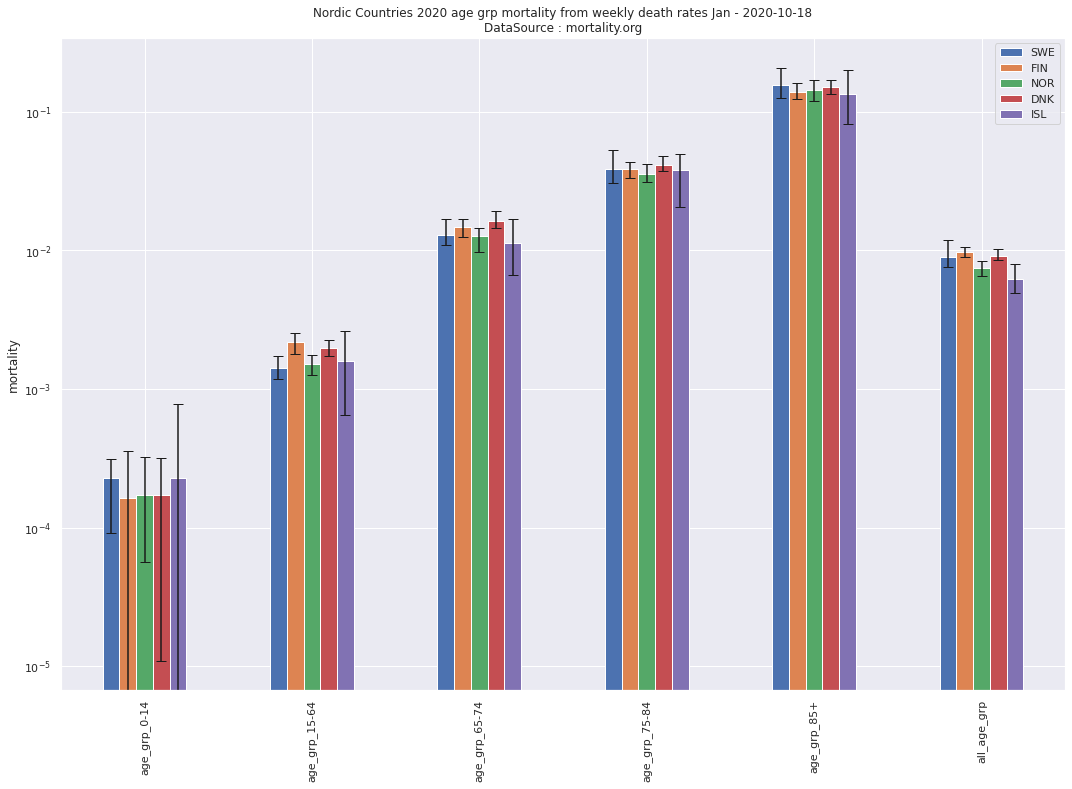

In [120]:
all_means.plot(kind='bar',
               figsize=(18,12),yerr=all_cis,error_kw={'capsize' : 5,'ecolor':'k','label' : '89%'},
               title='Nordic Countries 2020 age grp mortality from weekly death rates Jan - {}\nDataSource : mortality.org'.format(last_date))

plt.ylabel('mortality')
plt.yscale('log')
plt.savefig('nordic_mortality_bar_chart.jpg',format='jpg')

<AxesSubplot:>

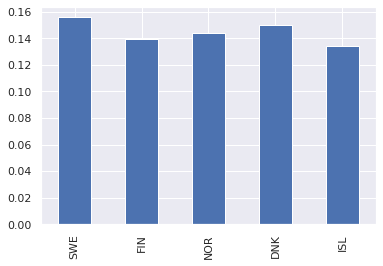

In [117]:
all_means.loc['age_grp_85+'].plot(kind='bar')

<AxesSubplot:>

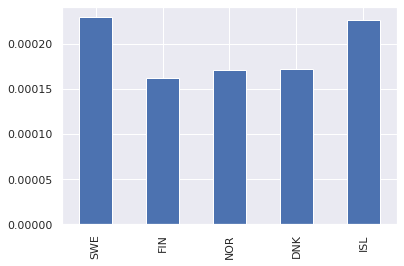

In [118]:
all_means.loc['age_grp_0-14'].plot(kind='bar')